# MARKETING CAMPAIGN ANALYSIS PROJECT

## INTRODUCTION
In the realm of marketing, understanding customer behavior and predicting responses to offers is crucial for optimizing campaigns and driving profitability. Comprehensive customer data, including demographics (e.g., education, marital status, income), purchasing behavior (e.g., spending on various products, channel preferences), and response history (e.g., campaign acceptance rates, purchase recency), provides invaluable insights into what influences customer spending and offer acceptance.


Moreover, this dataset includes variables such as household composition (e.g., number of small children, teenagers), website engagement metrics (e.g., visit frequency), and customer feedback (e.g., complaints), offering deeper context for refining marketing strategies. By harnessing this comprehensive analysis, organizations can identify highly responsive customer segments, optimize resource allocation, and elevate engagement levels. This approach aims to achieve greater profitability through targeted and effective marketing initiatives.

### PROBLEM STATEMENT
The challenge lies in effectively understanding customer behavior and predicting their responses to marketing offers by leveraging comprehensive analyses of demographics, purchasing behavior, and response history. This understanding is crucial for optimizing campaign efficacy and driving enhanced profitability.

### OBJECTIVE
The objective of this project is to enhance marketing campaign efficiency by analyzing how customer demographics, purchase behavior, and income influence spending and offer acceptance. These insights will help optimize marketing strategies and increase profitability.

In [3]:
#know your directory path
pwd

'C:\\Users\\user\\Desktop\\DATA SCIENCE\\PYTHON ZACRAC'

In [1]:
#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [4]:
#load the tsv file
campaign = pd.read_csv('C:\\Users\\user\\Desktop\\DATA SCIENCE\\PYTHON ZACRAC\\Datasets\\marketing_campaign.csv', sep = '\t')

In [5]:
#display the first 5 columns of the dataset
campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Content* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
*  Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* 
MntSweetProducts - amount spent on sweet products in the last 2 year
* 
MntWines - amount spent on wine products in the last 2 yea
* 
MntGoldProds - amount spent on gold products in the last 2 year
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of daysurchasers since the last purchase

In [5]:
campaign.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#statistical summary
campaign.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
 campaign[campaign.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [16]:
campaign.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [15]:
campaign[campaign.isnull().any(axis=1)] 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [17]:
campaign.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Data Transformation

In [5]:
campaign_copy= campaign.copy()

In [6]:
campaign_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
campaign_copy['AcceptedCmp1'][campaign_copy['AcceptedCmp1']==1]= 'Accepted Offer'
campaign_copy['AcceptedCmp1'][campaign_copy['AcceptedCmp1']==0]= 'Rejected Offer'

campaign_copy['AcceptedCmp2'][campaign_copy['AcceptedCmp2']==1]= 'Accepted Offer'
campaign_copy['AcceptedCmp2'][campaign_copy['AcceptedCmp2']==0]= 'Rejected Offer'

campaign_copy['AcceptedCmp3'][campaign_copy['AcceptedCmp3']==1]= 'Accepted Offer'
campaign_copy['AcceptedCmp3'][campaign_copy['AcceptedCmp3']==0]= 'Rejected Offer'

campaign_copy['AcceptedCmp4'][campaign_copy['AcceptedCmp4']==1]= 'Accepted Offer'
campaign_copy['AcceptedCmp4'][campaign_copy['AcceptedCmp4']==0]= 'Rejected Offer'

campaign_copy['AcceptedCmp5'][campaign_copy['AcceptedCmp5']==1]= 'Accepted Offer'
campaign_copy['AcceptedCmp5'][campaign_copy['AcceptedCmp5']==0]= 'Rejected Offer'

campaign_copy['Response'][campaign_copy['Response']==1]= 'Accepted Offer'
campaign_copy['Response'][campaign_copy['Response']==0]= 'Rejected Offer'

campaign_copy['Complain'][campaign_copy['Complain']==1]= 'Yes'
campaign_copy['Complain'][campaign_copy['Complain']==0]= 'No'

In [18]:
campaign_copy.head(8)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Accepted Offer
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer


## Data Cleaning

In [7]:
# Filling the missing values of the income column with the mean income of each education status
mean_income_by_education = campaign_copy.groupby('Education')['Income'].transform('mean') 
campaign_copy['Income'] = campaign_copy['Income'].fillna(mean_income_by_education)



## RESEARCH QUESTIONS
1. Does the demographic of the customers affect/influence the mode of purchase?
2. Does the demographic of the customers affect the amount spent?
3. Does rejecting the offer affect the amount spent?
4. What is the popular mode of purchase among the people accepting the offer?
5. Does the customers' response to the marketing campaign depends on their last purchase?
6. What are the factors that influence a customer rejecting the campaign offer?
7. Does the customers' income affect the amount spent?

### MEDTHODOLOGY
Using Chi-square test, T-test, Pearson correlation and Logistic regression

In [14]:
# verify
campaign_copy.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Exploratory Data Analysis (EDA)

In [15]:
campaign_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Accepted Offer
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer


In [8]:
from datetime import date
# Calculating current year
current_year = date.today().year

# Adding column "Age"
campaign_copy['Age'] = current_year - campaign_copy['Year_Birth']

In [17]:
campaign_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Accepted Offer,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,43


In [18]:
campaign_copy['Age'].sort_values()

46       28
1170     28
2213     29
995      29
747      29
       ... 
424      83
1950     84
192     124
339     125
239     131
Name: Age, Length: 2240, dtype: int64

In [9]:
#Now let's create a function to categorize the ages of individuals into predefined age groups
age_groups = [(20,30),(31,40),(41,50),(51,60), (61,70),(71,85),(86,135)]

def create_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return('Unknown')

campaign_copy['Age_Group'] = campaign_copy['Age'].apply(create_age_group)

In [22]:
campaign_copy[['Age','Age_Group']].head()

,Age,Age_Group
0,67,61 - 70
1,70,61 - 70
2,59,51 - 60
3,40,31 - 40
4,43,41 - 50


In [23]:
campaign_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Accepted Offer,67,61 - 70
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,70,61 - 70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,59,51 - 60
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,40,31 - 40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,43,41 - 50


In [10]:
campaign_copy['Total_Amount_Spent'] = campaign_copy[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [11]:
#Now let's combine different columns into 1 to have a more usable dataset

campaign_copy['Total_Children'] = campaign_copy[['Kidhome','Teenhome']].sum(axis=1)


In [27]:
campaign_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_Amount_Spent,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Accepted Offer,67,61 - 70,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,70,61 - 70,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,59,51 - 60,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,40,31 - 40,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,43,41 - 50,422,1


###  Research Question 1. 
#### Does the demographic of the customers affect/influence the mode of purchase?

In [14]:
demographics= campaign_copy[['Education', 'Marital_Status', 'Total_Children', 'Age_Group']]
purchase_mode= campaign_copy[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]



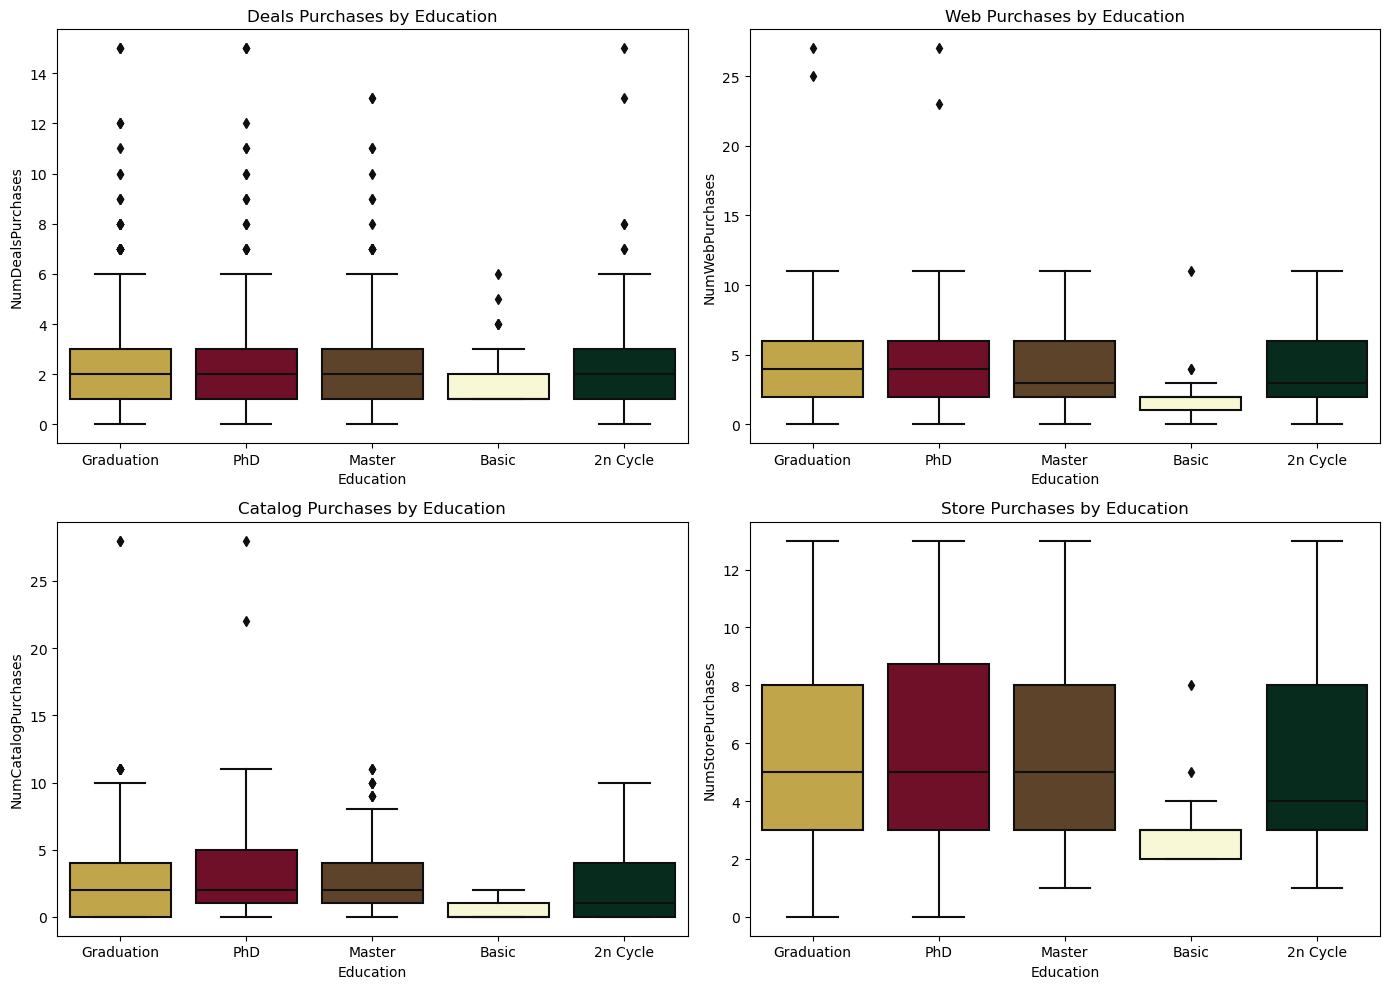

In [12]:
luxury_colors = ['#D4AF37', '#800020', '#654321', '#FFFDD0', '#013220', '#B76E79', '#4B0082', '#FFD700', '#5D3A3A']
luxury_palette = sns.color_palette(luxury_colors)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Education', y='NumDealsPurchases', data=campaign_copy, palette=luxury_palette)
plt.title('Deals Purchases by Education')

plt.subplot(2, 2, 2)
sns.boxplot(x='Education', y='NumWebPurchases', data=campaign_copy, palette=luxury_palette)
plt.title('Web Purchases by Education')

plt.subplot(2, 2, 3)
sns.boxplot(x='Education', y='NumCatalogPurchases', data=campaign_copy, palette=luxury_palette)
plt.title('Catalog Purchases by Education')

plt.subplot(2, 2, 4)
sns.boxplot(x='Education', y='NumStorePurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Store Purchases by Education')

plt.tight_layout()
plt.show()


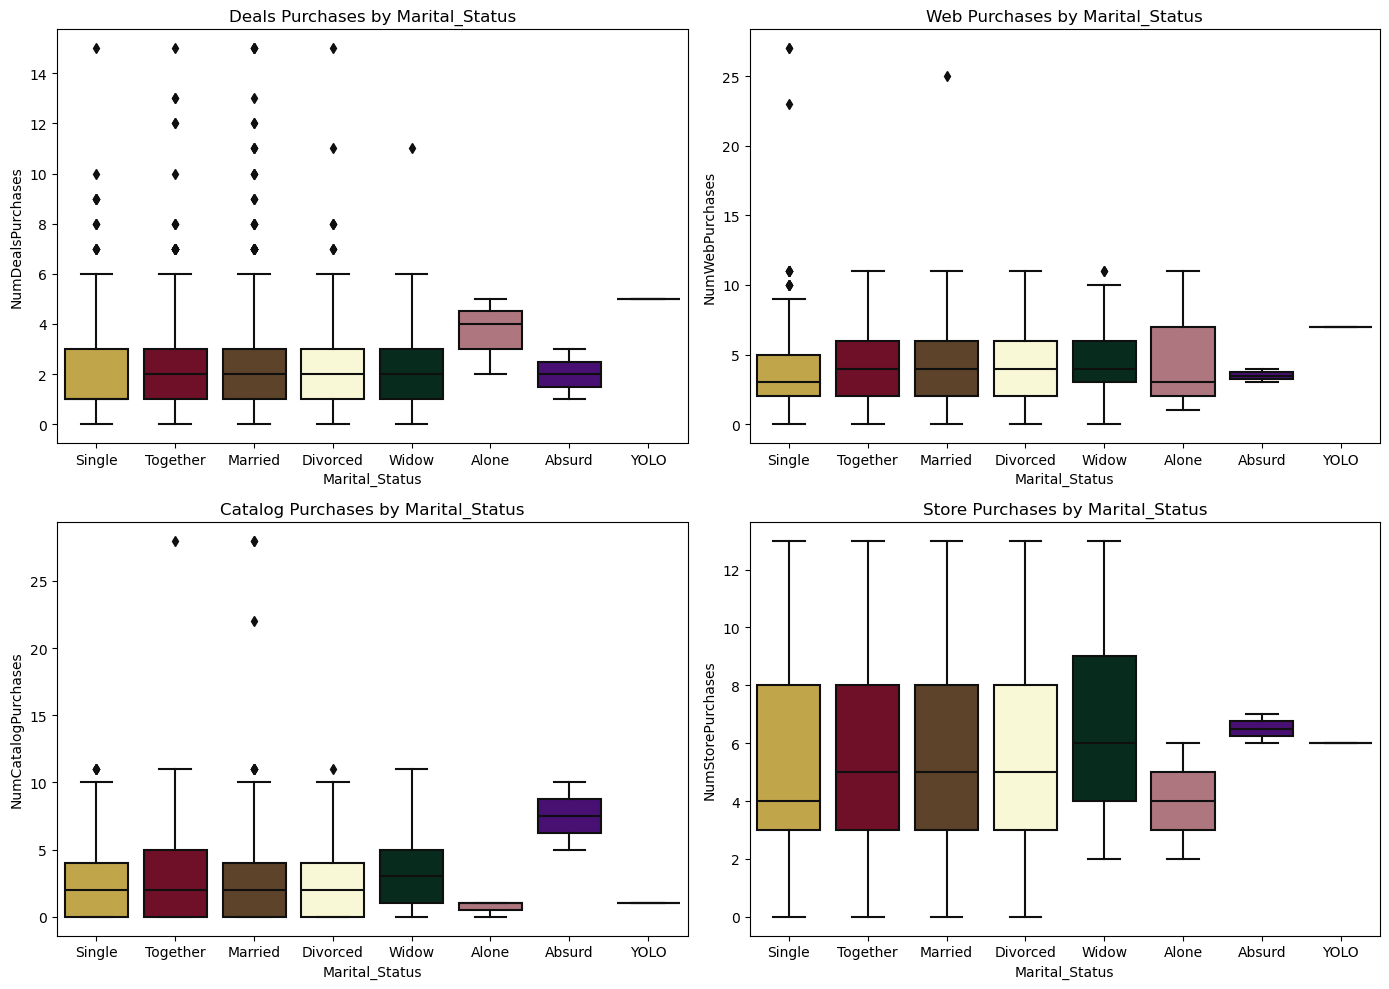

In [17]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Marital_Status', y='NumDealsPurchases', data=campaign_copy, palette= luxury_palette )
plt.title('Deals Purchases by Marital_Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='Marital_Status', y='NumWebPurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Web Purchases by Marital_Status')

plt.subplot(2, 2, 3)
sns.boxplot(x='Marital_Status', y='NumCatalogPurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Catalog Purchases by Marital_Status')

plt.subplot(2, 2, 4)
sns.boxplot(x='Marital_Status', y='NumStorePurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Store Purchases by Marital_Status')

plt.tight_layout()
plt.savefig('Marital_chart.png')

plt.show()


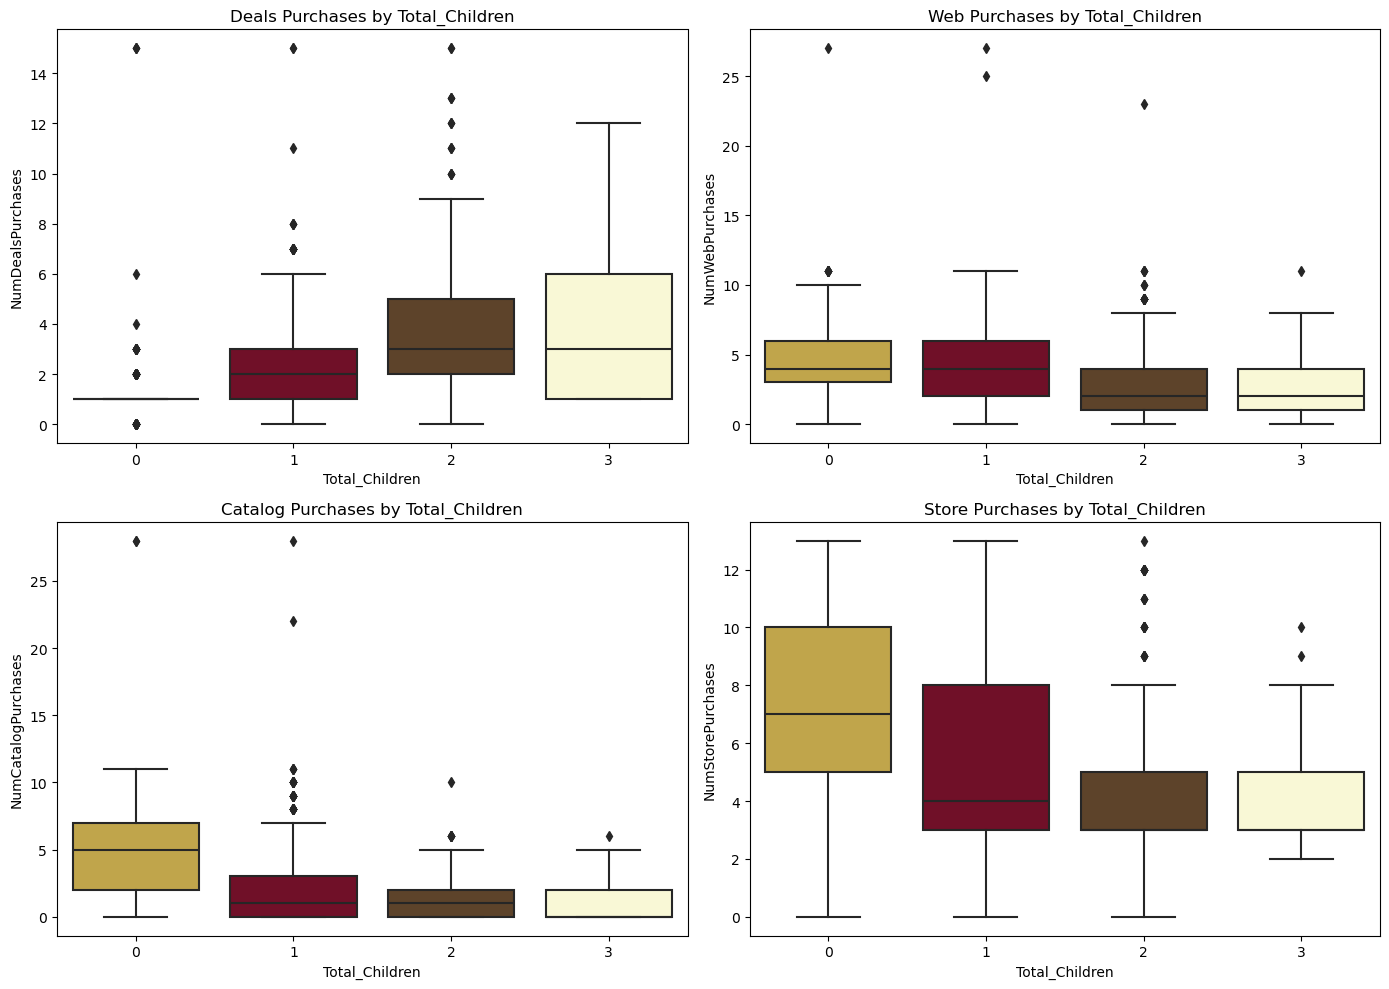

In [48]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Total_Children', y='NumDealsPurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Deals Purchases by Total_Children')

plt.subplot(2, 2, 2)
sns.boxplot(x='Total_Children', y='NumWebPurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Web Purchases by Total_Children')

plt.subplot(2, 2, 3)
sns.boxplot(x='Total_Children', y='NumCatalogPurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Catalog Purchases by Total_Children')

plt.subplot(2, 2, 4)
sns.boxplot(x='Total_Children', y='NumStorePurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Store Purchases by Total_Children')

plt.tight_layout()
plt.show()

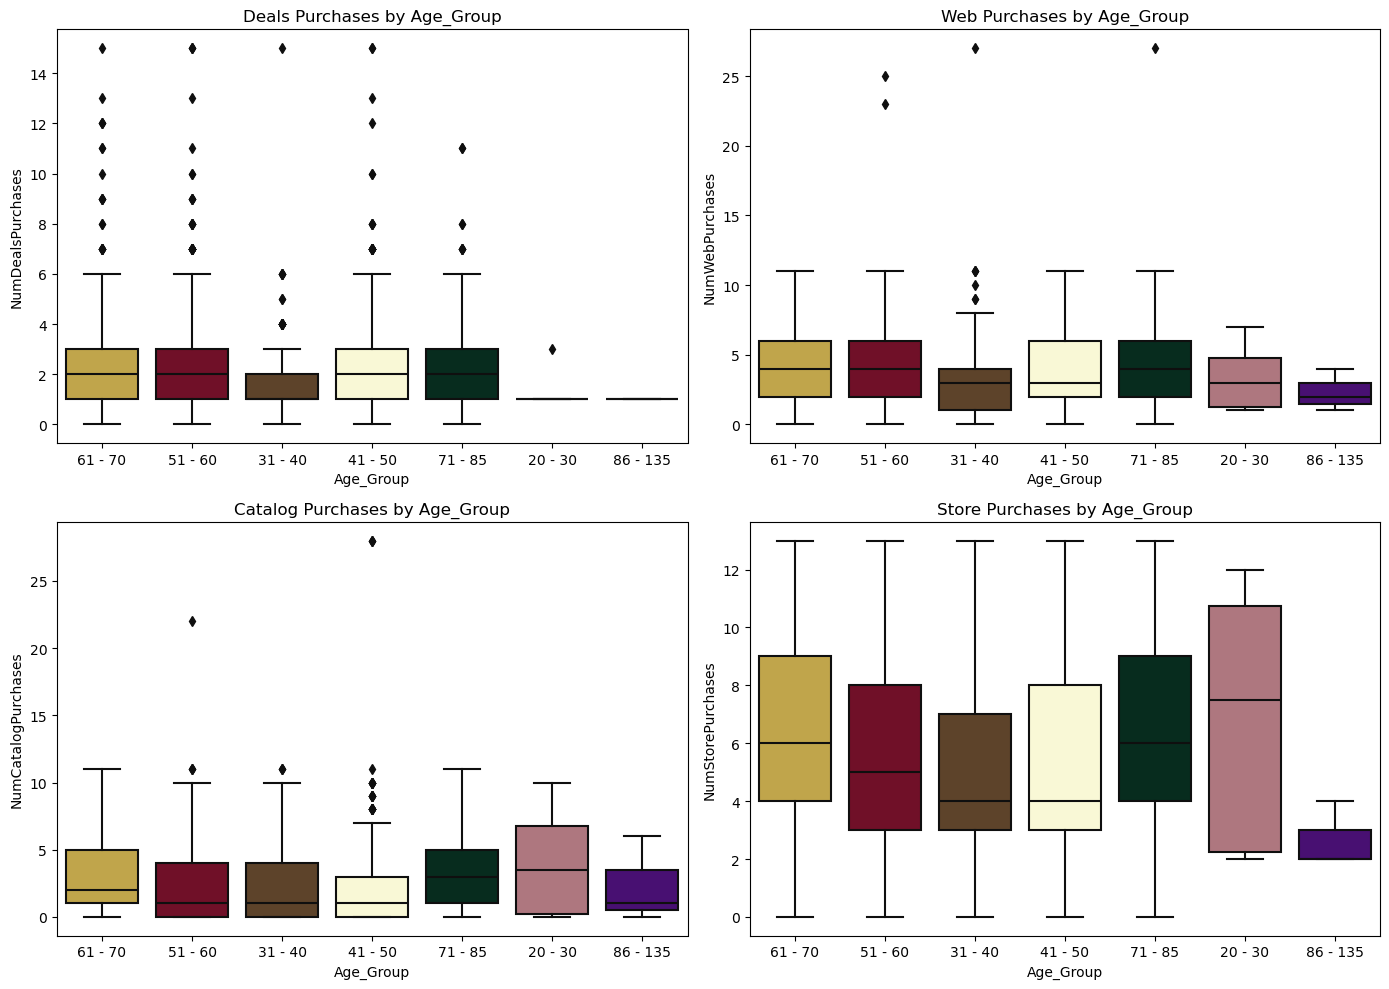

In [51]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Age_Group', y='NumDealsPurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Deals Purchases by Age_Group')

plt.subplot(2, 2, 2)
sns.boxplot(x='Age_Group', y='NumWebPurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Web Purchases by Age_Group')

plt.subplot(2, 2, 3)
sns.boxplot(x='Age_Group', y='NumCatalogPurchases', data=campaign_copy,palette= luxury_palette)
plt.title('Catalog Purchases by Age_Group')

plt.subplot(2, 2, 4)
sns.boxplot(x='Age_Group', y='NumStorePurchases', data=campaign_copy, palette= luxury_palette)
plt.title('Store Purchases by Age_Group')

plt.tight_layout()
plt.show()

From the boxplots, it can be inferred that the demographic of the customers does not influence the mode of purchase.

Most of the customers prefer store purchases while the deal purchase has the least number of customers.

### Chi-Square Test


Let's check if the marital status influences the modes of purchase:

#### Hypothesis:H0: There is no significant association between customers' demographics and the mode of purchase

10: There i a s significan tassociationp betweencustomers' demographics and the mode of purchase.

In [17]:
#import scipy.stats 
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(campaign_copy['Marital_Status'], campaign_copy['NumWebPurchases'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Test Statistic: 108.49289514173962
P-Value: 0.2201962988340332


Since the p-value (0.2201962988340332) is greater than the confidence level (0.05), we fail to reject the null hypothesis.

This means that we do not have sufficient evidence to conclude that there is a significant association between customers' demographics (Marital_Status) and the mode of purchase (NumWebPurchases).

In [24]:
# Create a contingency table
contingency_table = pd.crosstab(campaign_copy['Marital_Status'], campaign_copy['NumStorePurchases'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Test Statistic: 91.70263403795416
P-Value: 0.459632302737529


We can see that the p-value is greater than the confidence level (0.05), the null hypothesis can not be rejected.

There is no significant relationship between the customers's marital status and the mode of purchase.

Therefore, the marital status of the customers does not influence their mode of purchase  in the company.

In [25]:
# Create a contingency table
contingency_table = pd.crosstab(campaign_copy['Age_Group'], campaign_copy['NumWebPurchases'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Test Statistic: 115.88841394941933
P-Value: 0.012107400420323143


The high chi-square confirms the high genuity and marginal effect of the statistic.

using a confidence level of 95% with the p-value of 0.012107400420323143 lower than the confidence value of 0.05, the null hypothesis is rejected Therefore, there is a significant association between the age group and the mode of purchase (web purchase).e.

In [26]:
# Create a contingency table
contingency_table = pd.crosstab(campaign_copy['Age_Group'], campaign_copy['NumStorePurchases'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Test Statistic: 170.67836901513945
P-Value: 7.110406953559753e-09


The high chi-square confirms the high genuity and marginal effect of the statistic.

using a confidence level of 95% with the p-value of 7.110406953559753e-09 lower than the confidence value of 0.05, the null hypothesis is rejected

Therefore, there is a significant association between the age group and the mode of purchase(store purchase)

### Research Question 2
#### Does the demographic of the customers affect the amount spent?

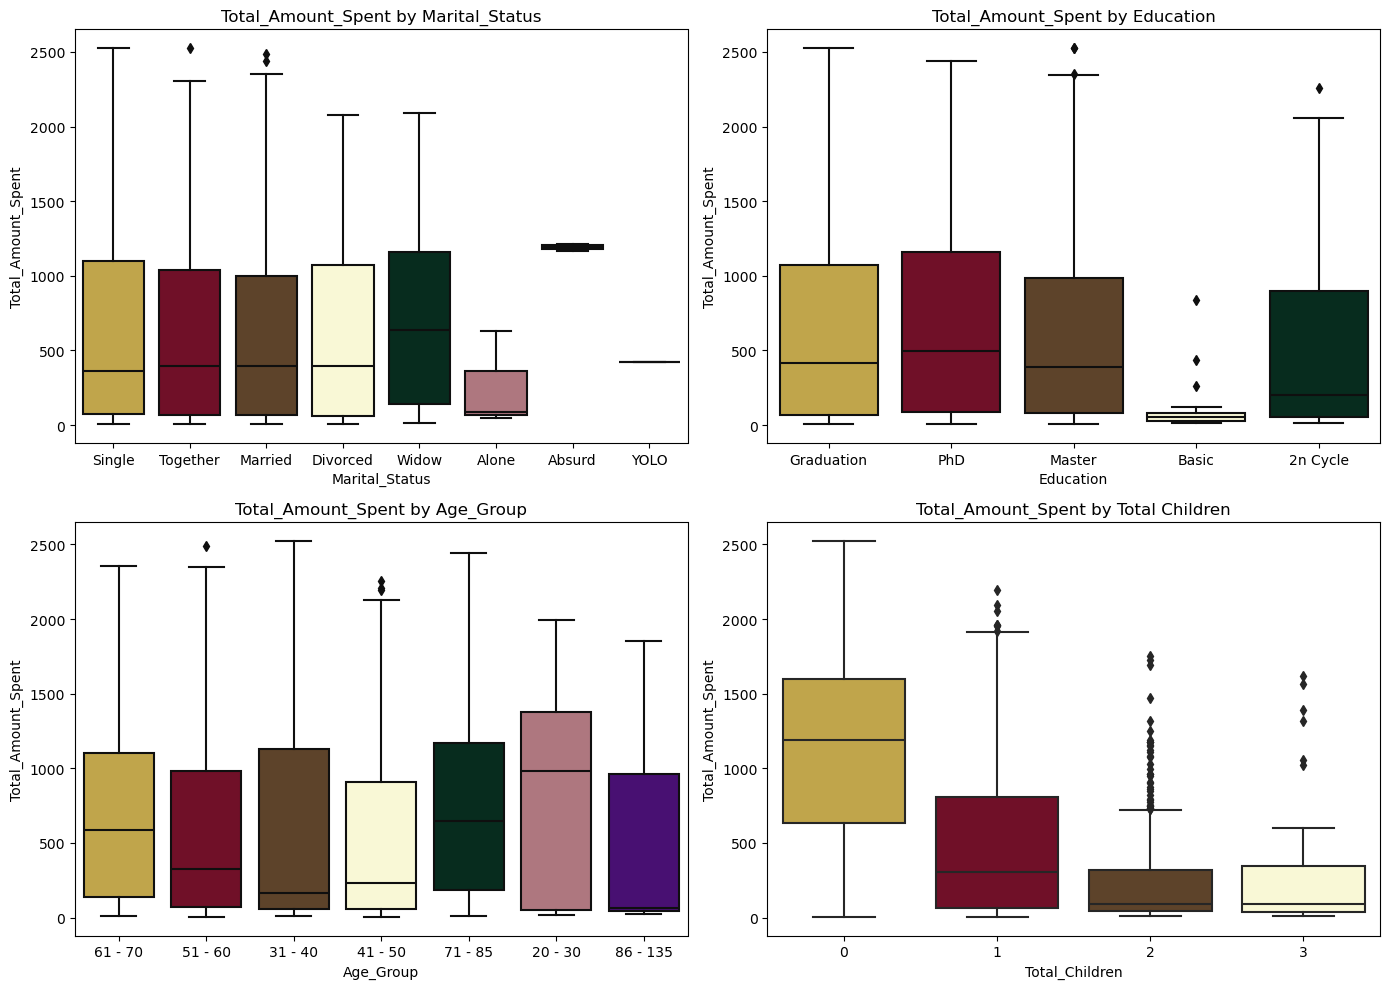

In [18]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Marital_Status', y='Total_Amount_Spent', data=campaign_copy, palette= luxury_palette)
plt.title('Total_Amount_Spent by Marital_Status')

plt.subplot(2, 2, 2)
sns.boxplot(x='Education', y='Total_Amount_Spent', data=campaign_copy, palette= luxury_palette)
plt.title('Total_Amount_Spent by Education')

plt.subplot(2, 2, 3)
sns.boxplot(x='Age_Group', y='Total_Amount_Spent', data=campaign_copy, palette= luxury_palette)
plt.title('Total_Amount_Spent by Age_Group')

plt.subplot(2, 2, 4)
sns.boxplot(x='Total_Children', y='Total_Amount_Spent', data=campaign_copy, palette= luxury_palette)
plt.title('Total_Amount_Spent by Total Children')

plt.tight_layout()
plt.savefig('amount_chart.png')
plt.show()


Customers with no child tends to spend more. As the number of children increases, the total amount spent decreases. Customers within the age groups 31-40 and 71-85 tend to spend more in the store too. Also. singles and gradutes are the highest spenders of the firm.

The customers demographic affect how much they spend, customers with low number of family members are the major spenders of the company.

In [13]:
campaign_copy.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_Amount_Spent,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Accepted Offer,67,61 - 70,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,70,61 - 70,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,59,51 - 60,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,40,31 - 40,53,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,Rejected Offer,No,3,11,Rejected Offer,43,41 - 50,422,1


#### ANOVA Test for Numerical Variables

Let's check if the educational status affects the total amount spent :



H0: There is no significant difference in the total amount spent by individuals based on their education level.

H1: There is a significant difference in the total amount spent by individuals based on their education level.

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
model = ols('Total_Amount_Spent~Education', data= campaign_copy).fit()

model2= ols("Total_Amount_Spent ~ C(Education)", data =campaign_copy).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Amount_Spent   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     13.85
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           3.66e-11
Time:                        14:18:09   Log-Likelihood:                -17488.
No. Observations:                2240   AIC:                         3.499e+04
Df Residuals:                    2235   BIC:                         3.501e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 496.5271     41.793     11.881      0.000     414.571     578.483
Education[T.Basic]       -414.7308     91.174     -4.549      0.000    -593.524    -235.937
Education[T.Graduation]   123.3718     45.401      2.717      0.007      34.340     212.404
Education[T.Master]       115.2540     52.009      2.216      0.027      13.264     217.244
Education[T.PhD]          175.8824     49.761      3.535      0.000      78.299     273.465
==============================================================================
Omnibus:                      215.594   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.349
Skew:                           0.833   Prob(JB):                     3.25e-59
Kurtosis:                       2.671   Cond. No.                         9.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
anova_table= sm.stats.anova_lm(model,type = 2)

In [33]:
print(anova_table)

               df        sum_sq       mean_sq          F        PR(>F)
Education     4.0  1.964480e+07  4.911201e+06  13.851391  3.657678e-11
Residual   2235.0  7.924499e+08  3.545637e+05        NaN           NaN


The results indicate that education levels significantly affect spending (F-statistic: 13.85, p-value: 3.66e-11). Individuals with higher education levels (Graduation, Master, PhD) spend more, while those with Basic education spend less. All education levels have statistically significant effects on spending (p-values < 0.05). However, the low R-squared value suggests that other factors beyond education levels likely influence total spending.



### Research Question 3.
#### Does rejecting the the last offer affect the amount spent? 

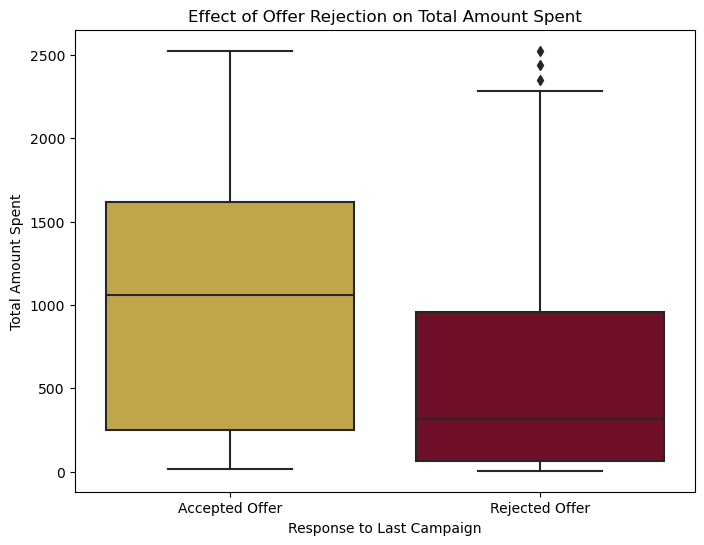

In [25]:

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='Total_Amount_Spent', data=campaign_copy, palette= luxury_palette)
plt.title('Effect of Offer Rejection on Total Amount Spent')
plt.xlabel('Response to Last Campaign')
plt.ylabel('Total Amount Spent')
plt.savefig('offer_chart.png')
plt.show()

From the plot the above, the customers that accepted the last campaign offer spent more money in the company than those that rejected the offer.

This can be further tested using the statistical test.


####  Statistical Test (T-Test)


Let's check if rejecting the last campaign offer affects the total amount spent:

#### Hypothesis
H0: there is a no significant association between the response to the last campaign and the amount of money spent in the store.

H1: there is significant association between the response to the last campaign and the amount of money spent in the store

In [28]:
rejected_offer= campaign_copy['Total_Amount_Spent'][campaign_copy['Response']== 'Rejected Offer']
accepted_offer= campaign_copy['Total_Amount_Spent'][campaign_copy['Response']== 'Accepted Offer']

In [37]:
import researchpy as rp

In [38]:
summary,test=  rp.ttest(rejected_offer, accepted_offer, group1_name= 'Rejected Offer', group2_name='Accepted Offer')


In [34]:
print(summary)

         Variable       N        Mean          SD         SE   95% Conf.  \
0  Rejected Offer  1906.0  538.929171  553.103565  12.669078  514.082448   
1  Accepted Offer   334.0  987.392216  719.009695  39.342460  910.001133   
2        combined  2240.0  605.798214  602.249288  12.724839  580.844499   

      Interval  
0   563.775894  
1  1064.783298  
2   630.751929  


In [35]:

print(test)

                                Independent t-test    results
0  Difference (Rejected Offer - Accepted Offer) =   -448.4630
1                            Degrees of freedom =   2238.0000
2                                             t =    -13.0170
3                         Two side test p value =      0.0000
4                        Difference < 0 p value =      0.0000
5                        Difference > 0 p value =      1.0000
6                                     Cohen's d =     -0.7721
7                                     Hedge's g =     -0.7719
8                                Glass's delta1 =     -0.8108
9                              Point-Biserial r =     -0.2653


With the p-value of 0.000000 which is less than the confidence value, the null hypothesis is rejected.

There is a significant association between the response to the last campaign offer and the total amount spent in the company.

This further coroborate the result gotten from the boxplot. Accepting the last campaign offer influences or makes the customer to spend more in the company compared to those customers that rejected the offer.

### Research Question 4
#### What is the popular mode of purchase among the people accepting the offer?

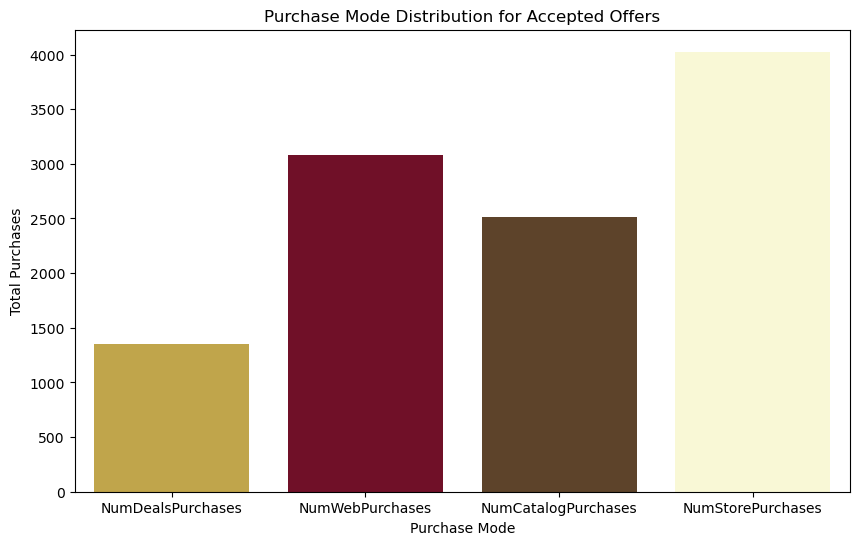

In [23]:
# Combine the acceptance columns into a single column
campaign_copy['Any_Accepted'] = campaign_copy[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']].apply(lambda x: 'Accepted Offer' in x.values, axis=1)

# Filter the data for rows where any offer was accepted
accepted_offers = campaign_copy[campaign_copy['Any_Accepted']]

# Sum the values for each purchase mode
purchase_mode_sum = accepted_offers[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_mode_sum.index, y=purchase_mode_sum.values, palette = luxury_palette)

# Add title and labels
plt.title('Purchase Mode Distribution for Accepted Offers')
plt.xlabel('Purchase Mode')
plt.ylabel('Total Purchases')

# Show plot
plt.show()

Customers that go to the store for their purchase accepted more of the offer. Customers that shop off the website also accepted more offers.
The store and the web purchase are the major purchase mode of the customers.

### Research Question 5.
#### Does the customers' response to the marketing campaign depends on their last purchase?

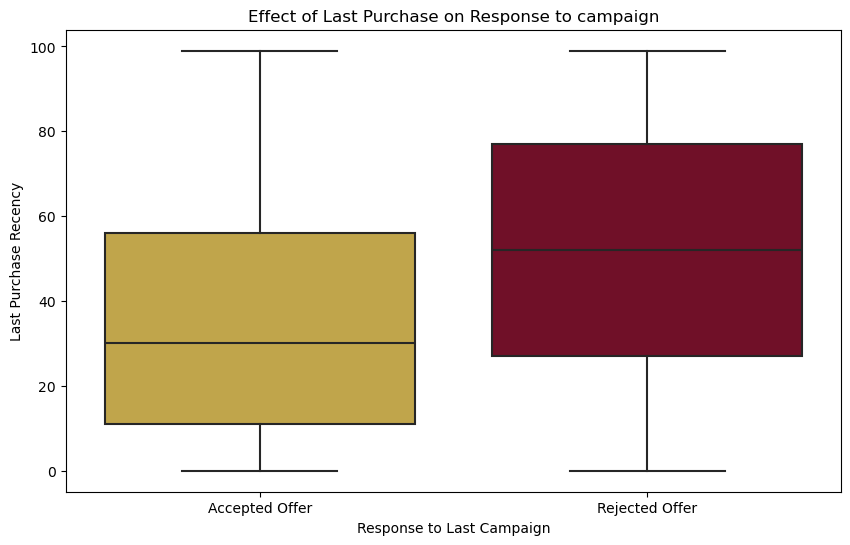

In [15]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Recency', data=campaign_copy, palette= luxury_palette)

# Add title and labels
plt.title('Effect of Last Purchase on Response to campaign')
plt.xlabel('Response to Last Campaign')
plt.ylabel('Last Purchase Recency')

# Show plot
plt.show()

Customers that rejected the last campaign offer have higher last-purchase-days compared to those that accepted the offer. This means customers that rejected the last campaign offer are not really the company regular customers.

### Chi-Square Test

Let's check if the customers' response depends on their last purchase:

### Hypothesis
H0 = There is no significant association between the response to the last campaign and the recency of the last purchase.

H1 = There is  significant association between the response to the last campaign and the recency of the last purchase.

In [25]:
# Create a contingency table
contingency_table = pd.crosstab(campaign_copy['Response'], campaign_copy['Recency'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Test Statistic: 201.2333158895788
P-Value: 5.9269892257759916e-09


In [19]:
contingency_table

Recency,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Response,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accepted Offer,7,9,10,9,4,6,3,5,9,8,10,6,10,6,4,5,5,5,4,7,4,2,1,6,5,3,3,3,4,3,7,4,2,2,2,7,5,3,3,2,7,2,2,2,3,0,3,3,3,1,1,1,1,5,4,5,6,0,4,0,6,3,4,0,3,2,1,2,2,1,2,4,1,5,1,3,3,1,2,3,3,5,2,0,1,0,1,1,2,1,2,0,0,1,1,1,3,2,2,1
Rejected Offer,21,15,18,20,23,9,18,7,16,16,16,20,14,21,15,11,16,15,15,18,17,19,12,22,23,22,18,24,19,26,25,14,19,15,21,10,13,21,22,17,18,13,18,18,8,17,28,16,25,29,21,27,21,15,28,15,31,24,11,14,16,18,15,23,20,28,15,16,23,15,16,25,26,15,25,14,16,24,24,14,25,22,20,22,22,18,25,26,14,19,18,18,30,20,25,18,22,18,20,16


In [27]:
from bioinfokit.analys import stat
import researchpy as 
from scipy.stats import ttest_ind

In [31]:
summary, test = rp.ttest (rejected_offer, accepted_offer,
                         group1_name = 'Rejected',
                         group2_name = 'Accepted')

In [32]:
print(summary)

   Variable       N       Mean         SD        SE  95% Conf.   Interval
0  Rejected  1906.0  51.514690  28.519092  0.653242  50.233545  52.795836
1  Accepted   334.0  35.383234  27.659499  1.513460  32.406085  38.360382
2  combined  2240.0  49.109375  28.962453  0.611944  47.909339  50.309411


In [34]:
test

,Independent t-test,results
0,Difference (Rejected - Accepted) =,16.1315
1,Degrees of freedom =,2238.0000
2,t =,9.5780
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.5682
7,Hedge's g =,0.5680
8,Glass's delta1 =,0.5656
9,Point-Biserial r =,0.1984


The mean recency for customers who rejected the offer was 51.51 days, with a standard deviation of 28.52 days, while for customers who accepted the offer, the mean recency was 35.38 days, with a standard deviation of 27.66 days.

Using a confidence level of 95% (α = 0.05), the independent t-test results indicate a statistically significant difference in recency between the two groups (t = 9.5780, p < 0.001). Therefore, we reject the null hypothesis, suggesting that the recency of the last purchase is associated with the customers' response to the marketing campaign.

### Research Question 6. What are the factors that influence a customer rejecting the campaign offer?

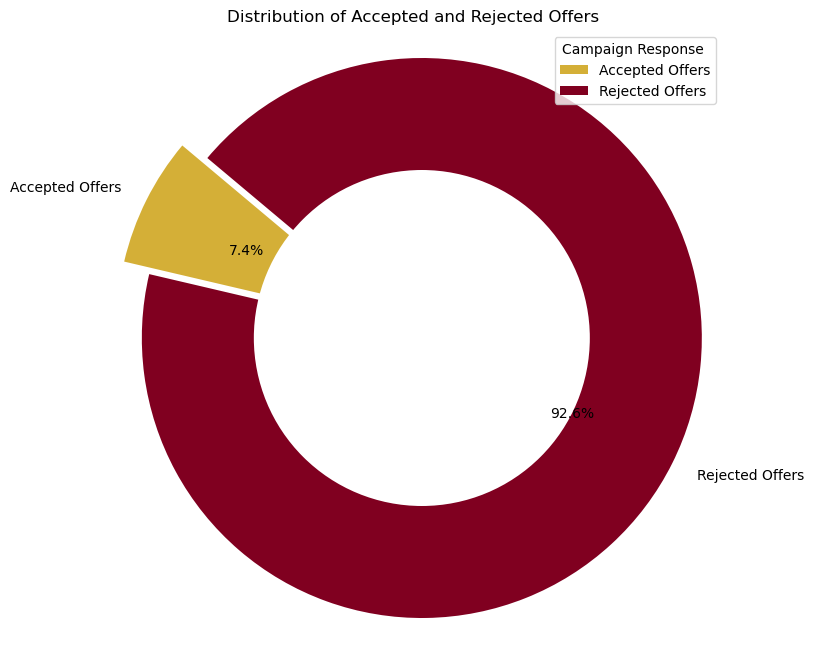

In [28]:
# Calculate acceptance and rejection sums
acceptance = (campaign_copy[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']] == 'Accepted Offer').sum().sum()
rejection = (campaign_copy[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']] == 'Rejected Offer').sum().sum()


labels = ['Accepted Offers', 'Rejected Offers']
sizes = [acceptance, rejection]
colors = ['#D4AF37', '#800020']
explode = (0.1, 0)  # explode 1st slice (Accepted Offers)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

#draw circle
centre_circle= plt.Circle((0,0), 0.60, fc='white')
fig=plt.gcf()

#adding circle to pie chart
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Accepted and Rejected Offers')
plt.axis('equal')

#adding legends
plt.legend(loc='upper right', title= 'Campaign Response ')
plt.savefig('rejection_chart.png')
plt.show()

Logistic Regression

For this question, we'll use logistic regression to identify factors influencing campaign offer acceptance:

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare the data
X = campaign_copy[['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
y = campaign_copy['Response'].apply(lambda x: 1 if x == 'Rejected Offer' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Display the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)



              precision    recall  f1-score   support

           0       0.64      0.19      0.29        95
           1       0.88      0.98      0.93       577

    accuracy                           0.87       672
   macro avg       0.76      0.59      0.61       672
weighted avg       0.85      0.87      0.84       672

                Feature  Coefficient
0                   Age     0.009800
1                Income     0.000018
2               Kidhome    -0.006964
3              Teenhome     0.027168
4               Recency     0.026129
5              MntWines    -0.002269
6             MntFruits    -0.001935
7       MntMeatProducts    -0.001906
8       MntFishProducts     0.001301
9      MntSweetProducts    -0.002056
10         MntGoldProds    -0.003865
11    NumDealsPurchases    -0.009602
12      NumWebPurchases    -0.063459
13  NumCatalogPurchases    -0.053939
14    NumStorePurchases     0.178953


The analysis revealed several significant insights based on various customer demographics and purchasing behaviors. The model achieved an overall accuracy of 87%, indicating its reasonable effectiveness in predicting offer rejection. The precision and recall for customers who rejected offers were 0.64 and 0.19, respectively, highlighting the model's limited performance in identifying customers who rejected offers. The F1-score for rejected offers was 0.29, reflecting the model's challenges in predicting these outcomes.


Key findings from the feature coefficients include that older customers and those with higher recency values were more likely to reject new offers, with positive coefficients of 0.009800 and 0.026129, respectively. Spending habits also played a role; higher expenditures on wines, fruits, meats, sweets, and gold products slightly decreased the likelihood of rejecting offers, with coefficients of -0.002269, -0.001935, -0.001906, -0.002056, and -0.003865, respectively. Additionally, customers who frequently engaged in deal purchases, web purchases, and catalog purchases were less inclined to reject offers, with coefficients of -0.009602, -0.063459, and -0.053939, respectively. In contrast, higher numbers of store purchases were associated with an increased likelihood of rejection, indicated by a coefficient of 0.178953. These insights suggest that targeted marketing efforts should consider these factors to effectively reduce offer rejection rates.

## Research Question 7: Does the customers' income affect the amount spent?
Pearson Correlation

Let's check the correlation between customers' income and the amount spent on all products:

H0: There is no significant relationship between Income and Total Amount Spent

H1: There is a significant relationship between Income and Total Amount Spent 

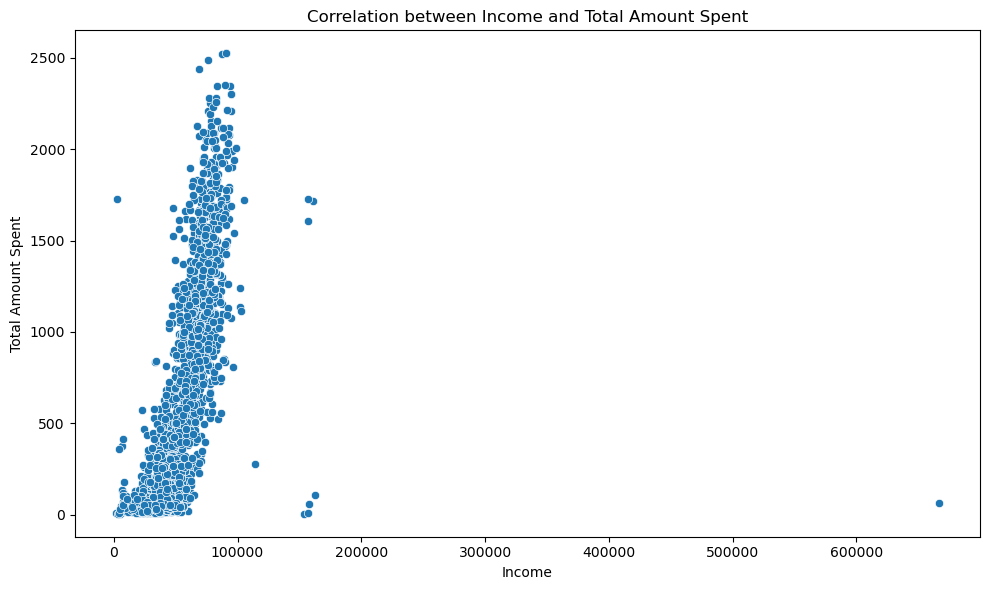

In [26]:
# Plot the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Amount_Spent', data=campaign_copy)
plt.title('Correlation between Income and Total Amount Spent')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.tight_layout()
plt.savefig('income_chart.png')
plt.show()

In [19]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
correlation, p_value = pearsonr(campaign_copy['Income'], campaign_copy['Total_Amount_Spent'])

# Display the results
print(f"Pearson Correlation: {correlation}")
print(f"P-Value: {p_value}")


Pearson Correlation: 0.6644611547947316
P-Value: 2.0685996552957965e-285


In [20]:
## Decision rule 
alpha = 0.05
if p_value >= alpha: 
    print('Accept H0: There is no significant relationship between Income and Total Amount Spent')
else: 
    print('Reject H0: There is significant relationship between Income and Total Amount Spent')

Reject H0: There is significant relationship between Income and Total Amount Spent


In [24]:
print(f"""The correlation test examines the relationship between customers's income and the total amount they spent in the store. The correlation coefficient r = {round(correlation,2)} shows that there exists a moderately strong positive linear relationship between income and total amount spent. Also, since the p-value < 0.01, there is a statsitical evidence to reject the null hypothesis and conclude that the relationship between customer's income and total amount spent in the store, is significant.
This implies that an increase in the customer's income could lead to increase in the total amount spent and vice versa""")

The correlation test examines the relationship between customers's income and the total amount they spent in the store. The correlation coefficient r = 0.66 shows that there exists a moderately strong positive linear relationship between income and total amount spent. Also, since the p-value < 0.01, there is a statsitical evidence to reject the null hypothesis and conclude that the relationship between customer's income and total amount spent in the store, is significant.
This implies that an increase in the customer's income could lead to increase in the total amount spent and vice versa


### DISCUSSION

The analysis reveals several key insights about customer behavior and marketing effectiveness. Firstly, the demographic of the customers does not significantly influence the mode of purchase, with store purchases being the most popular across all demographic segments. However, a significant association was found between age groups and the mode of purchase, with specific age groups showing different preferences for web and store purchases.

The demographic factors, particularly the number of children and education levels, significantly affect the amount spent. Customers with no children and higher education levels (Graduation, Master, PhD) tend to spend more, whereas those with Basic education spend less. This indicates that family size and education level are critical factors influencing spending behavior.

The acceptance of the last campaign offer has a notable impact on the amount spent. Customers who accepted the last offer spent significantly more than those who rejected it, indicating that successful campaign acceptance can drive higher spending.

In terms of purchase modes, customers who shop in stores or on the web tend to accept more offers. This suggests that these channels are more effective in engaging customers with promotional offers.

The recency of the last purchase also plays a critical role in campaign response. Customers who rejected the last offer had a higher mean recency, indicating they are less frequent buyers. The statistical analysis confirms a significant difference in recency between those who accepted and those who rejected the offer.

Several factors influence a customer's likelihood of rejecting a campaign offer. Older customers and those with higher recency values are more likely to reject offers, while higher expenditures on specific product categories and frequent deal, web, and catalog purchases decrease the likelihood of rejection. Conversely, a higher number of store purchases increases the likelihood of rejecting offers.

Lastly, the analysis confirms a moderately strong positive relationship between income and the total amount spent. Customers with higher incomes tend to spend more, underscoring the importance of targeting affluent demographics to boost sales.



### RECOMMENDATION

The findings from the analysis aimed at optimizing marketing strategies to maximize profitability and customer engagement. the comprehensive study delved into customer behavior insights and campaign performance metrics to derive actionable recommendations for strategic enhancement.

Based on the analysis,   refining the marketing strategies with a focus on aligning them closely with customer behavior dynamics is recommended. It is crucial to diversify the marketing channels, encompassing both physical and digital platforms, to effectively cater to diverse customer preferences and maximize outreach. Targeting campaigns towards higher-educated and affluent demographics using personalized messaging and tailored incentives has shown potential to significantly enhance engagement and conversion rates.

Furthermore, the study underscores the importance of optimizing campaign acceptance by tailoring offers to align with recent purchase behaviors. This approach not only drives higher customer spending but also maximizes return on investment from our marketing initiatives. To mitigate offer rejection, addressing demographic factors such as age and spending habits is essential. By ensuring the messaging resonates broadly across customer segments, rejection rates can be effectively reduced and overall campaign performance improved.

In conclusion, by implementing these strategic initiatives, marketing effectiveness can be elevated, deeper customer loyalty can be cultivated, and sustained profitability can be achieved. 